# project Data Mining

# Réalisé par : Nidhal Hazbri 3DNI2

## Objectifs :
    • Maitriser l’API de twitter pour l’extraction des tweets
    • Maitriser la partie NLP (natural language processing) avec NLTK en Python
    • Appliquer les principes de nettoyage des données
    • Classer les tweets : regrouper ensemble les tweets qui sont similaires. C’est une étape qui peutêtre considérée comme une étape 

## Specifications
lmaginons que vous avez un compte Twitter, et que vous lez suivre les tweets sur ce reseau social. Vu le nombre colossal de Tweets, et faute de temps, vous n'avez pas la possibilite de les lire tous. Pour cela, vous avez besoin d'une application qui va jouer le role d'assistantet qui va
vous effectuer un resume de toutes ces informations. Une des approches qu'on peut utiliser estde le classer sous former de groupes de sorte a ce qu'on presente a l'utilisateur un seul Tweet de
chaque groupe. Pour cela, on doit proceder en trois grandes etapes :


## Travail faire
On a Telecharger les tweets a partir de Twitter en utilisant l'API de twitter. Pour cela, vous devriez un compte « Twitter Developper ». Pour cela, vous devriez telecharger au moins 10 mille twwets. Pour la documentation de l'API de twitter, vous pouvez consulter les liens suivants :


In [1]:
import pandas as pd
import tweepy
consumer_key="LHZVzcEN30hfmN2cPBqkoB3wq"
consumer_secret="DGZ7gQFDlqXoPfmAUWHOsY2eMTA0qhgKVb3rbExcx8Vhav3x3a"
access_token="1325046107437752325-a2zNm36NnzJqTFBFkIagjzpkdCadjs"
access_token_secret="7ohQJ7WTf2DuHsr9NNwPkOPXq5zUkaycrzo2nPhPUoGLL"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [2]:
twitter_data_analysis = pd.DataFrame(columns = ['text'])
tweets = tweepy.Cursor(api. user_timeline , id="twitter").items( 15000)

# Iterate and print tweets
i=0
for tweet in tweets:
    twitter_data_analysis.loc[i,"text"] = tweet.text
    i+=1
    
    

In [3]:
import csv
twitter_data_analysis.to_csv('twitter_data_analysis.csv',index = False)
twitter_data_analysis.head(10)

,text
0,@DeePeeArts you're all amazing
1,RT @shesooosaddity: if you had a twitter befor...
2,@CloudNaii 40404
3,@issahairplug drink water replaced good morning
4,@Ne_ThatGuy we're taking oomf to the Fleets
5,"@_JusJust_ remember ""I dedicate my 500th Tweet..."
6,@ambr_ncole they're tourists
7,@PhallonXOXO proof you're doing it right 😌
8,some of you hating...\n\nbut we see you Fleeti...
9,That thing you didn’t Tweet but wanted to but ...


In [4]:
twitter_data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3219 entries, 0 to 3218
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3219 non-null   object
dtypes: object(1)
memory usage: 210.3+ KB


## Pretraitement des tweets
Dans cette etape, l'objectif est d'eliminer le texte inutile des tweets tels que les #, les noms des utilisateurs, les url,emoji ...


In [5]:
import re
for index, row in twitter_data_analysis.iterrows():
    err = row['text']
    new0 = re.sub(r"http\S+", "", err)
    new1 = re.sub(r"#\S+", "", new0)
    new2 = re.sub(r"@\S+", "", new1)
    new3 = re.sub(r"\n+", "", new2)
    new4 = re.sub(r"RT+", "", new3)
    new5 = re.sub("hhh+", '', new4)
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    new6 = re.sub(emoji_pattern, "", new5)
    twitter_data_analysis.loc[index,'text'] =new6
    
    

In [6]:
twitter_data_analysis.head(40)

,text
0,you're all amazing
1,if you had a twitter before 2020 rt this
2,40404
3,drink water replaced good morning
4,we're taking oomf to the Fleets
5,"remember ""I dedicate my 500th Tweet to:____"""
6,they're tourists
7,proof you're doing it right
8,some of you hating...but we see you Fleeting
9,That thing you didn’t Tweet but wanted to but ...


In [7]:
twitter_data_analysis.to_csv('cleaning_twitter_data_analysis.csv',index = False)


In [8]:
import nltk 
nltk.download('stopwords' )

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nidhal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Traitement des tweets: NLP (Natural LanguageProcessing)
On doit proceder a !'analyse du tweet en respectant les differentes etapes du NLP (Natural LanguageProcessing). La bibliotheque a utiliser est NLTK en Python.


In [9]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer() 
stemed_dataset=[]
for i in range(0,twitter_data_analysis.shape[0]):
    stemmed_array=twitter_data_analysis['text'][i].split()
    stemmed=[ps.stem(word) for word in stemmed_array if not word in set(stopwords.words('english'))]
    stemmed=' '.join(stemmed)
    stemed_dataset.append(stemmed)
print(stemed_dataset[0:10])

['amaz', 'twitter 2020 rt', '40404', 'drink water replac good morn', "we'r take oomf fleet", 'rememb "I dedic 500th tweet to:____"', "they'r tourist", 'proof right', 'hating...but see fleet', 'that thing didn’t tweet want didn’t got close like nah. We place for…']


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X=cv.fit_transform(stemed_dataset)
print(X)

  (0, 136)	1
  (1, 2571)	1
  (1, 30)	1
  (1, 2041)	1
  (2, 44)	1
  (3, 746)	1
  (3, 2676)	1
  (3, 1979)	1
  (3, 1048)	1
  (3, 1582)	1
  (4, 2686)	1
  (4, 2376)	1
  (4, 1703)	1
  (4, 938)	1
  (5, 1972)	1
  (5, 652)	1
  (5, 49)	1
  (5, 2558)	1
  (5, 2476)	1
  (5, 62)	1
  (6, 2432)	1
  (6, 2505)	1
  (7, 1885)	1
  (7, 2011)	1
  (8, 938)	1
  :	:
  (3213, 1426)	1
  (3213, 222)	1
  (3213, 1691)	1
  (3213, 516)	1
  (3214, 349)	1
  (3214, 2438)	1
  (3214, 1327)	1
  (3214, 181)	1
  (3215, 2686)	1
  (3215, 959)	1
  (3215, 1426)	1
  (3215, 2573)	1
  (3215, 121)	1
  (3215, 2724)	1
  (3215, 515)	1
  (3216, 1055)	1
  (3216, 1162)	1
  (3216, 884)	1
  (3217, 429)	1
  (3218, 1048)	2
  (3218, 1582)	1
  (3218, 2558)	1
  (3218, 1642)	1
  (3218, 142)	1
  (3218, 1089)	1


## Classification des tweets
Etant donne un ensemble de tweets, l'objectif est de les resumer sous formes de groupes de sorte
a ce que les Tweets qui sont dans le meme groupe soient similaires. Ainsi, l'utilisateur pourra par la suite lire juste un Tweet de chaque groupe (le Tweet qui est le centro"ide de groupes).
on a Utiliser l'algorithme K-Means pour classer les Tweets en k classes ,valeurs de k allant de 1 a30 par exemple).


In [11]:
from sklearn.cluster import KMeans
wcss=[]

In [12]:
for i in range(1,30):
    Kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0,verbose=True)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

Initialization complete
Iteration  0, inertia 20954.000
Iteration  1, inertia 11249.716
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.241928e-07
Initialization complete
Iteration  0, inertia 11371.000
Iteration  1, inertia 11249.716
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.241928e-07
Initialization complete
Iteration  0, inertia 20662.000
Iteration  1, inertia 11249.716
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.241928e-07
Initialization complete
Iteration  0, inertia 17801.000
Iteration  1, inertia 11249.716
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.241928e-07
Initialization complete
Iteration  0, inertia 17801.000
Iteration  1, inertia 11249.716
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.241928e-07
Initialization complete
Iteration  0, inertia 20938.000
Iteration  1, inertia 11249.716
Converged at iteration 1: center shift 0.000000e+00 within tol

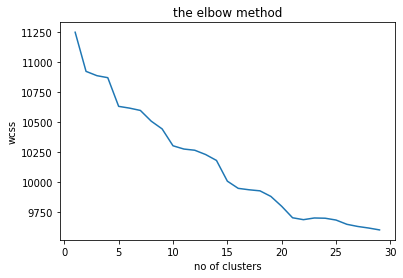

In [13]:

import matplotlib.pyplot as plt
plt.plot(range(1,30),wcss)
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [14]:
true_k=30
Kmeans=KMeans(n_clusters=true_k,init='k-means++',n_init=1)
Kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

##### La cellule suivante contient les mots cles de chaque cluster

In [15]:

print("Top terms per cluster:")
order_centroids = Kmeans.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()
print("\n")

Top terms per cluster:
Cluster 0:
 we
 if
 could
 time
 figur
 travel
 voice
 cher
 speed
 up

Cluster 1:
 twitter
 we
 you
 it
 us
 like
 that
 know
 time
 need

Cluster 2:
 dm
 love
 we
 you
 share
 gratitude
 follow
 us
 do
 much

Cluster 3:
 retweet
 it
 read
 that
 growth
 we
 ll
 befor
 remind
 article

Cluster 4:
 chicken
 soup
 noodl
 side
 tweet
 flame
 fli
 flex
 fleet
 flaw

Cluster 5:
 tweet
 one
 like
 good
 thi
 we
 that
 us
 everi
 look

Cluster 6:
 figur
 tri
 feel
 realli
 tell
 flame
 fli
 flex
 fleet
 flaw

Cluster 7:
 tweet
 twitter
 peopl
 us
 3rd
 ur
 want
 octob
 more
 rol

Cluster 8:
 like
 most
 fit
 ever
 king
 tribut
 tweet
 ᵗᶦⁿʸ
 flavor
 flip

Cluster 9:
 dm
 slide
 now
 right
 searching
 click
 away
 rol
 hard
 io

Cluster 10:
 don
 get
 they
 if
 twitter
 you
 ᵗᶦⁿʸ
 flashback
 fli
 flex

Cluster 11:
 the
 email
 tweet
 can
 wait
 fit
 flashback
 flight
 fli
 flex

Cluster 12:
 we
 twitter
 introduc
 hi
 flame
 fli
 flex
 fleet
 flaw
 flavor

Cluster 13:
 d

On a choisir un Tweet par classe comme representant. Les tweets choisis seront les resumes de toutes les informations contenues dans les tweets.

In [18]:
result_final_twitter_data_analysis = pd.DataFrame(columns = [ 'text'])
i=0
j=0
while i<30:
    while True: 
        Y=cv.transform([stemed_dataset[j]])
        prediction=Kmeans.predict(Y)
        if i == prediction:
            print("tweet of cluster "+str(prediction)+twitter_data_analysis.loc[j,"text"])
            result_final_twitter_data_analysis.loc[i,"text"] =twitter_data_analysis.loc[j,"text"]
            j=0
            break
        j+=1
    i+=1
result_final_twitter_data_analysis.to_csv('result_final_twitter_data_analysis.csv',index = False )

tweet of cluster [0] We finally figured out time travel
tweet of cluster [1] you're all amazing
tweet of cluster [2] Thank you so much for all that you do, we’d love to share our gratitude. Follow us so we can DM you.
tweet of cluster [3]Reading an article before Retweeting it? That’s growth.Before you Retweet an article, we’ll remind you to read it… 
tweet of cluster [4] chicken noodle soup, chicken noodle soup, chicken noodle soup with a Tweet on the side
tweet of cluster [5] remember "I dedicate my 500th Tweet to:____"
tweet of cluster [6] she's trying to figure out how to tell you how she really feels
tweet of cluster [7]You can Tweet a Tweet. But now you can Tweet your voice!Rolling out today on iOS, you can now record and Tweet wi… 
tweet of cluster [8]Most liked Tweet ever.  A tribute fit for a King.  
tweet of cluster [9]Slide into those DMs without clicking away from your timeline.Rolling out on web. 
tweet of cluster [10] IF THEY DON'T GET TWITTER THEY DON'T GET YOU
tweet of 

## conclusion :
#### on a charge les tweets d'apres l'api de twitter, on les a mis dans le fichier csv twitter_data_analysis. puis on a fait le data cleaning et on a mis le resultat dans le fichier cleaning_twitter_data_analysis.csv.Et enfin on a mis un tweet de chaque cluster dans le fichier result_final_twitter_data_analysis.



# [lien github](https://github.com/hazbri/projectDataMining/)